In [1]:
import pandas as pd

projects1_1 = pd.read_csv('kickstarter-projects/ks-projects-201612.csv', encoding='latin1')
projects1_2 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv')
projects2 = pd.read_csv('funding-successful-projects-on-kickstarter/train.csv')

/Users/iped/miniconda2/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
pd.__version__

'0.22.0'

In [3]:
# Clean up the column names, which for some reason have spaces after them
projects1_1.columns = [x.strip() for x in projects1_1.columns]

# Get the common columns between the two datasets
overlapping_columns = list(set(projects1_1.columns) & set(projects1_2.columns))

# Join the datasets together
projects1 = projects1_1[overlapping_columns].append(projects1_2[overlapping_columns])

# Drop duplicates
projects1 = projects1.drop_duplicates('name')

In [4]:
projects = projects1.merge(projects2, on='name', how='inner')
projects = projects.dropna()
projects.columns

Index(['ID', 'name', 'main_category', 'deadline_x', 'state', 'category',
       'goal_x', 'pledged', 'currency_x', 'country_x', 'backers',
       'usd pledged', 'launched', 'project_id', 'desc', 'goal_y', 'keywords',
       'disable_communication', 'country_y', 'currency_y', 'deadline_y',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

In [5]:
renames = {
    'country_x': 'country',
    'currency_x': 'currency',
    'goal_x': 'goal',
    'goal_y': 'goal',
    'country_y': 'country',
    'currency_y': 'currency',
    'deadline_y': 'deadline',
    'backers_count': 'backers'
}

to_num = lambda x: pd.to_numeric(x, errors='coerce')
to_date = lambda x: pd.to_datetime(x, unit='s').astype(int)
conversions = {
    'usd pledged' : to_num,
    'backers': to_num,
    'deadline': to_date,
    'launched_at': to_date,
    'state_changed_at': to_date,
    'created_at': to_date,
    'goal': to_num,
    'pledged': to_num,
}

drops = (
    'ID', 'project_id', 'keywords', 'deadline_x', 'launched'
)

In [6]:
def clean_df(df, renames=None, retypes=None, drops=None):
    if renames is not None:
        for orig, new in renames.items():
            print(orig)
            if new in df.columns:
                diffs = df[[orig, new]][df[orig] != df[new]]
                print(diffs[:10])
                df = df.drop(orig, axis=1)
            else:
                df = df.rename(columns={orig: new})
    print(df.columns)
    if retypes is not None:
        for col, conv in retypes.items():
            dfcol = df[col]
            df = df.drop(col, axis=1)
            df[col] = conv(dfcol)
    if drops is not None:
        for col in drops:
            df = df.drop(col, axis=1)
            
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='any')
    return df
            
cleaned = clean_df(projects, renames, conversions, drops)   

country_x
currency_x
goal_x
goal_y
    goal_y   goal
0  45000.0  45000
1   2500.0   2500
2   1500.0   1500
3   3000.0   3000
4    500.0    500
5  17757.0  17757
6   3500.0   3500
7  25000.0  25000
8   4000.0   4000
9  15000.0  15000
country_y
     country_y country
106         US      GB
322         US      CA
378         CA      US
1131        US      CA
1269        US      GB
1884        CA      US
1971        US      CA
2025        AU      US
2344        US      GB
2944        GB      CA
currency_y
     currency_y currency
106         USD      GBP
322         USD      CAD
378         CAD      USD
1131        USD      CAD
1269        USD      GBP
1884        CAD      USD
1971        USD      CAD
2025        AUD      USD
2344        USD      GBP
2944        GBP      CAD
deadline_y
backers_count
   backers_count backers
0              3       3
1              0       0
2             16      16
3             20      20
4              3       3
5            571     571
6              1  

In [7]:
cleaned

,name,main_category,state,category,currency,country,desc,disable_communication,final_status,usd pledged,backers,deadline,launched_at,state_changed_at,created_at,goal,pledged
0,Where is Hank?,Film & Video,failed,Narrative Film,USD,US,"Abandoned Property. Sounds of struggle, muffle...",False,0,220.000000,3.0,1361834450000000000,1357946450000000000,1361834450000000000,1357603284000000000,45000.0,220.00
1,Of Jesus and Madmen,Publishing,failed,Nonfiction,CAD,CA,This is an autobiography of my personal experi...,False,0,0.000000,0.0,1381335577000000000,1378743577000000000,1381335577000000000,1378130153000000000,2500.0,0.00
2,The Beard,Comics,failed,Comic Books,USD,US,'The beard' is a comedy based comic about an a...,False,0,395.000000,16.0,1415482072000000000,1412886472000000000,1415482072000000000,1412172842000000000,1500.0,395.00
3,Notes From London: Above & Below,Publishing,failed,Art Books,USD,US,Notes From London: Above & Below is an unusual...,False,0,789.000000,20.0,1431285654000000000,1428693654000000000,1431285655000000000,1428526605000000000,3000.0,789.00
4,Mountain brew: A quest for alcohol sustainability,Food,failed,Drinks,NOK,NO,This is the start of an exiting venture of bre...,False,0,6.180008,3.0,1424888253000000000,1422296253000000000,1424888253000000000,1422045831000000000,500.0,48.00
5,Permaculture Skills,Film & Video,successful,Webseries,CAD,CA,A film series distilled from 20 days of cold-c...,False,1,43203.251145,571.0,1418576520000000000,1415984520000000000,1418576521000000000,1407959136000000000,17757.0,48905.00
6,Daily Brew Coffee,Food,failed,Food Trucks,GBP,GB,Daily Brew an artisan cafe based in a Piaggio ...,False,0,32.415261,1.0,1427817992000000000,1425229592000000000,1427817994000000000,1425208254000000000,3500.0,21.00
7,BB130A,Art,failed,Public Art,USD,US,This monumental event will exhibit how people ...,False,0,1395.000000,30.0,1364080048000000000,1360627648000000000,1364080048000000000,1360376872000000000,25000.0,1395.00
8,Arrows & Sound Debut Album,Music,successful,Indie Rock,USD,US,"Philip Zach, formerly of Remedy Drive, is reco...",False,1,8641.340000,157.0,1337382271000000000,1334790271000000000,1337382271000000000,1328116784000000000,4000.0,8641.34
9,Help Scott Reynolds Make a New Record!,Music,successful,Indie Rock,USD,US,It's been 4 years since his last release. He's...,False,1,17499.990000,277.0,1346604196000000000,1344012196000000000,1346604197000000000,1334611356000000000,15000.0,17499.99


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def summarize(df):
    n_failed = np.count_nonzero(df.final_status == 1)
    print("{} Failed".format(n_failed))
    n_success = np.count_nonzero(df.final_status == 0)
    print("{} Success".format(n_success))
    
def hist_by_group(df, groupname, n_groups=None):
    if n_groups is None:
        grouped = df.groupby(groupname)
        names = grouped.groups.keys()
    else:
        pcts = np.arange(0, 1, 1/float(n_groups))
        quantiles = df[groupname].quantile(pcts)
        inds = np.digitize(df[groupname], quantiles)
        grouped = df.groupby(inds)
        names = []
        for a, b in zip(pcts, pcts[1:]):
            names.append('{}-{}'.format(quantiles[a], quantiles[b]))
        names.append('{}-{}'.format(quantiles[b], max(df[groupname])))
    
    num_groups = len(grouped)
    
    successes = []
    failures = []

    margins = []
    totals = []
    
    for name, group in grouped:

        n_failed = np.count_nonzero(group.final_status == 0)
        n_success = np.count_nonzero(group.final_status == 1)
        successes.append(float(n_success) / len(group))
        failures.append(float(n_failed) / len(group))
        
        margins.append(np.abs(n_success - n_failed))
        totals.append(n_success + n_failed)
    
    bar_width = .25
    indices = np.arange(num_groups)
    
    
    margins, totals, successes, failures  = \
        zip(*sorted(zip(margins, totals, successes, failures), key=lambda x: x[0]/(x[0] + x[1])))
    
    plt.bar(indices, successes, bar_width, color='g', label='successes')
    plt.bar(indices + bar_width, failures, bar_width, color='r', label='failures')
    plt.xticks(indices + bar_width * 1.5, names)
    plt.gca().set_ylabel("Percentage")
    plt.gca().set_xlabel(groupname)
    plt.legend()
    
def rolling_success(df):
    
    statuses = df[['goal', 'final_status']][(df['final_status'] == 1) | (df['final_status'] == 0)]
    
    grouped = statuses.groupby((statuses['goal'] / 1000).astype(int))

    not_alone = grouped.size() > 10
    
    success_rate = grouped['final_status'].mean()[not_alone]
    
    ax = plt.subplot()
    print(success_rate.shape)
    plt.plot(success_rate.index, success_rate, '.')
    ax.set_xscale('log')
    ax.set_xlabel("Goal")
    ax.set_ylabel("Success Ratio")


31879 Failed
68453 Success


<IPython.core.display.Javascript object>


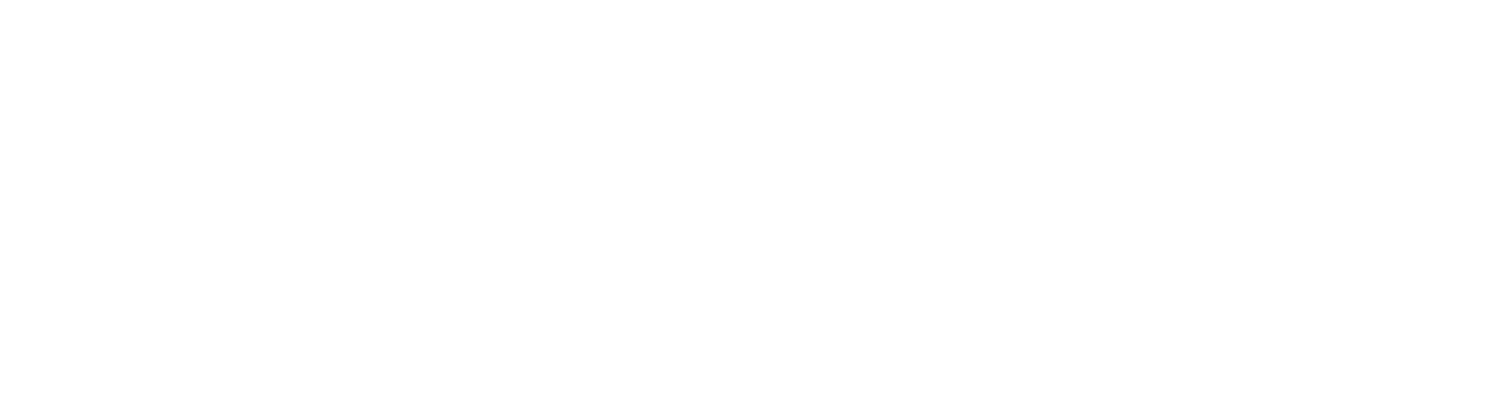

<IPython.core.display.Javascript object>


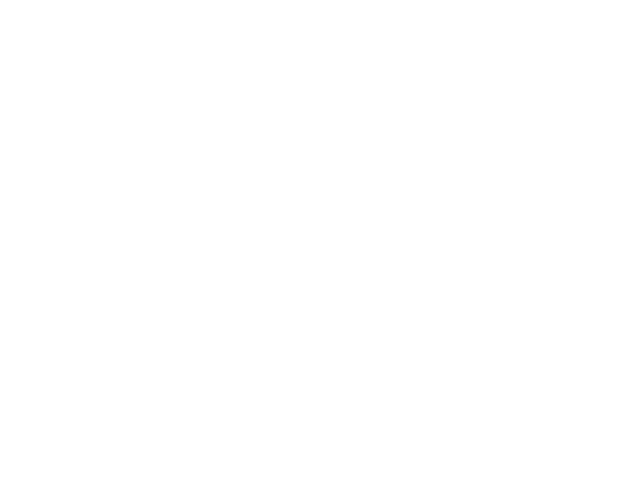

(126,)


In [9]:
%matplotlib notebook

summarize(cleaned)
plt.figure(figsize=(15, 4))
hist_by_group(cleaned, 'goal', 10)
plt.tight_layout()

plt.figure()
rolling_success(cleaned)


In [10]:
def goal_percent_comparison(successes, failures):
    ax = plt.subplot()
    plt.plot(successes.goal, successes.pledged/successes.goal, 'g.', alpha=.2)
    plt.plot(failures.goal, failures.pledged/failures.goal, 'r.', alpha=.2)
    ax.set_xscale('log')
    ax.set_xlabel('Goal')
    ax.set_ylabel('% Of Goal Reached')
    plt.ylim([0, 2])
    plt.legend(['successes','failures'])

<IPython.core.display.Javascript object>


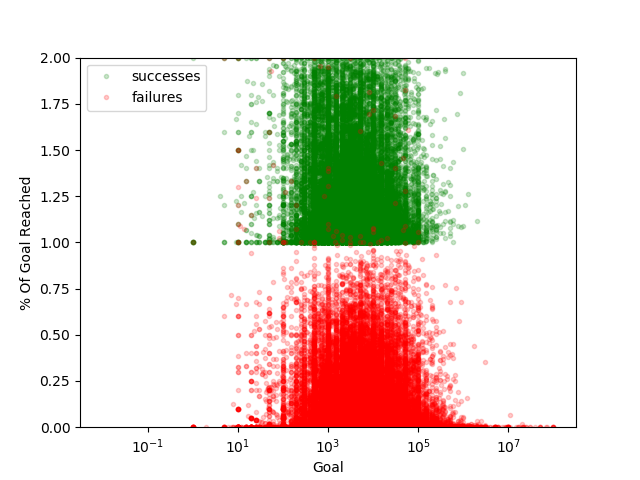

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt

successes = cleaned[cleaned.state == 'successful']
failures = cleaned[cleaned.state != 'successful']

goal_percent_comparison(successes,failures)

In [ ]:
cleaned.columns

In [12]:
from sklearn.feature_extraction import DictVectorizer

def create_feature_matrix(df,
                          scalars=None,
                          percentiles = None,
                          groups=None,
                          categoricals=None,
                          splits=None):
    # Should be done using apply or map or something like that
    ds = []
    Y = []
    grps = {}
    
    sorted_pcts = {}
    if percentiles:
        for pct in percentiles:
            sorted_pcts[pct] = np.array(sorted(df[pct]))
    
    if groups:
        for col, grp in groups.items():
            grps[col] = df[col].quantile(np.arange(0, 1, 1.0/grp))
    for _, r in df.iterrows():
        d = {}
        if percentiles is not None:
            for pct in percentiles:
                d[pct] = float(np.argmax(sorted_pcts[pct] > r[pct])) / len(sorted_pcts[pct])
        if groups is not None:
            for grp in groups:
                group = np.nonzero(grps[grp] <= r[grp])[0][-1]
                p = int(100.0 * group / len(grps[grp]))
                d[grp + str(p)] = 1
        if scalars is not None:
            for sca in scalars:
                try:
                    d[sca] = pd.to_numeric(r[sca])
                except:
                    print(d[sca])
                    continue
                        
        if categoricals is not None:
            for cat in categoricals:
                d[cat + r[cat]] = 1
        if splits is not None:
            for spl in splits:
                d.update({(spl+'-'+word): 1 for word in r[spl].split()})
        ds.append(d)
    v = DictVectorizer()
    print("Vectorizing")
    X = v.fit_transform(ds)
    return X.astype(float), v.get_feature_names()


In [43]:
goal_scalar_features, goal_scalar_feature_names = create_feature_matrix(cleaned,
    scalars = ('goal',)
)

Vectorizing


In [31]:
goal_pct_features, goal_pct_feature_names = create_feature_matrix(cleaned,
    percentiles = ('goal',)
)

Vectorizing


In [32]:
goal_group_features, goal_group_feature_names = create_feature_matrix(cleaned,
    groups={'goal': 5}
)

Vectorizing


In [13]:
all_features, all_feature_names = create_feature_matrix(cleaned,
    percentiles = ('goal', ),
    categoricals = ('category', 'main_category', 'country',),
    splits = ('desc', 'name',)
)

Vectorizing


In [29]:
string_features, string_feature_names = create_feature_matrix(cleaned,
    categoricals = ('category','main_category', 'country'),
    splits = ('desc', 'name')
)

Vectorizing


In [26]:
import numpy as np
import sklearn
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score

def run_classifier(X, Y, clf, n_folds=5):
    kf = KFold(n_splits=n_folds)
    
    p_corrects = []
    for train, test in kf.split(X):
        x_train = X[train]
        x_test = X[test]
        
        y_train = Y[train]
        y_test = Y[test]
        
        clf.fit(x_train, y_train)
        
        predY = clf.predict(x_test)
    
        p_corrects.append(np.count_nonzero(predY == y_test) / float(len(y_test)))
        print('\tFold accuracy: {:.3f}'.format(p_corrects[-1]))
        
    print("Mean correct across {} folds: {:.3f}".format(n_folds, np.mean(p_corrects)))


def run_classifier_2(X, Y, clf, n_folds=5):
    scores = cross_val_score(clf, X, Y, cv=n_folds)
    print("Mean correct across {} folds: {:.3f} +/- {:.3f}".format(n_folds, scores.mean(), scores.std()))
    
Y = (cleaned.state == 'successful').values

print("Baseline accuracy is {:.3f}".format( 1 - (float(sum(Y)) / len(Y))))

Baseline accuracy is 0.564


In [112]:
run_classifier(goal_scalar_features, Y, LinearSVC())

Mean correct across 5 folds: 0.573426248222


In [113]:
run_classifier(goal_pct_features, Y, LinearSVC())

Mean correct across 5 folds: 0.58637322619


In [27]:
import time
start = time.time()
run_classifier_2(all_features, Y, LinearSVC())
mid = time.time()
run_classifier(all_features, Y, LinearSVC())
end = time.time()

print("T1: {}".format(mid-start))
print("T2: {}".format(end-mid))

Mean correct across 5 folds: 0.726 +/- 0.003
	Fold accuracy: 0.722
	Fold accuracy: 0.728
	Fold accuracy: 0.725
	Fold accuracy: 0.722
	Fold accuracy: 0.730
Mean correct across 5 folds: 0.726
T1: 75.78528785705566
T2: 76.2191231250763


In [28]:
run_classifier(string_features, Y, LinearSVC())

NameError: name 'string_features' is not defined

In [23]:
run_classifier(all_features, Y, AdaBoostClassifier())

KeyboardInterrupt: 

In [137]:
run_classifier(all_features, Y, RandomForestClassifier(max_depth=8))

	Fold accuracy: 0.574
	Fold accuracy: 0.572
	Fold accuracy: 0.564
	Fold accuracy: 0.573
	Fold accuracy: 0.600
Mean correct across 5 folds: 0.577


In [131]:
run_classifier(all_features, Y, DecisionTreeClassifier(max_depth=3))

	Fold accuracy: 0.651
	Fold accuracy: 0.663
	Fold accuracy: 0.654
	Fold accuracy: 0.657
	Fold accuracy: 0.653
Mean correct across 5 folds: 0.656


In [132]:
run_classifier(all_features, Y, DecisionTreeClassifier(max_depth=8))

	Fold accuracy: 0.712
	Fold accuracy: 0.722
	Fold accuracy: 0.717
	Fold accuracy: 0.712
	Fold accuracy: 0.712
Mean correct across 5 folds: 0.715


In [19]:

dtree = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=10)
dtree.fit(string_features, Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
clf = LinearSVC()
clf.fit(all_features, Y)
pred = clf.predict(all_features)


<IPython.core.display.Javascript object>


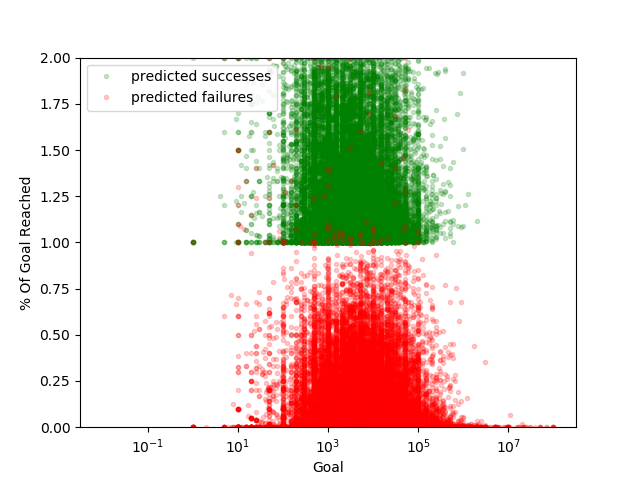

<IPython.core.display.Javascript object>


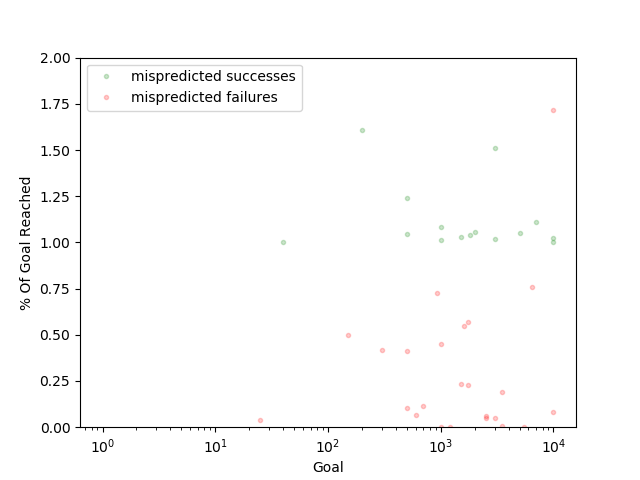

In [108]:
plt.figure()

pred_success = cleaned[pred == 1]
pred_failures = cleaned[pred == 0]
goal_percent_comparison(pred_success, pred_failures)
plt.legend(['predicted successes', 'predicted failures'])

mispred_success = cleaned[(pred == 0) & (cleaned.state == 'successful') ]
mispred_fail = cleaned[(pred == 1) & (cleaned.state != 'successful') ]
plt.figure()
goal_percent_comparison(mispred_success, mispred_fail)
plt.legend(['mispredicted successes', 'mispredicted failures'])

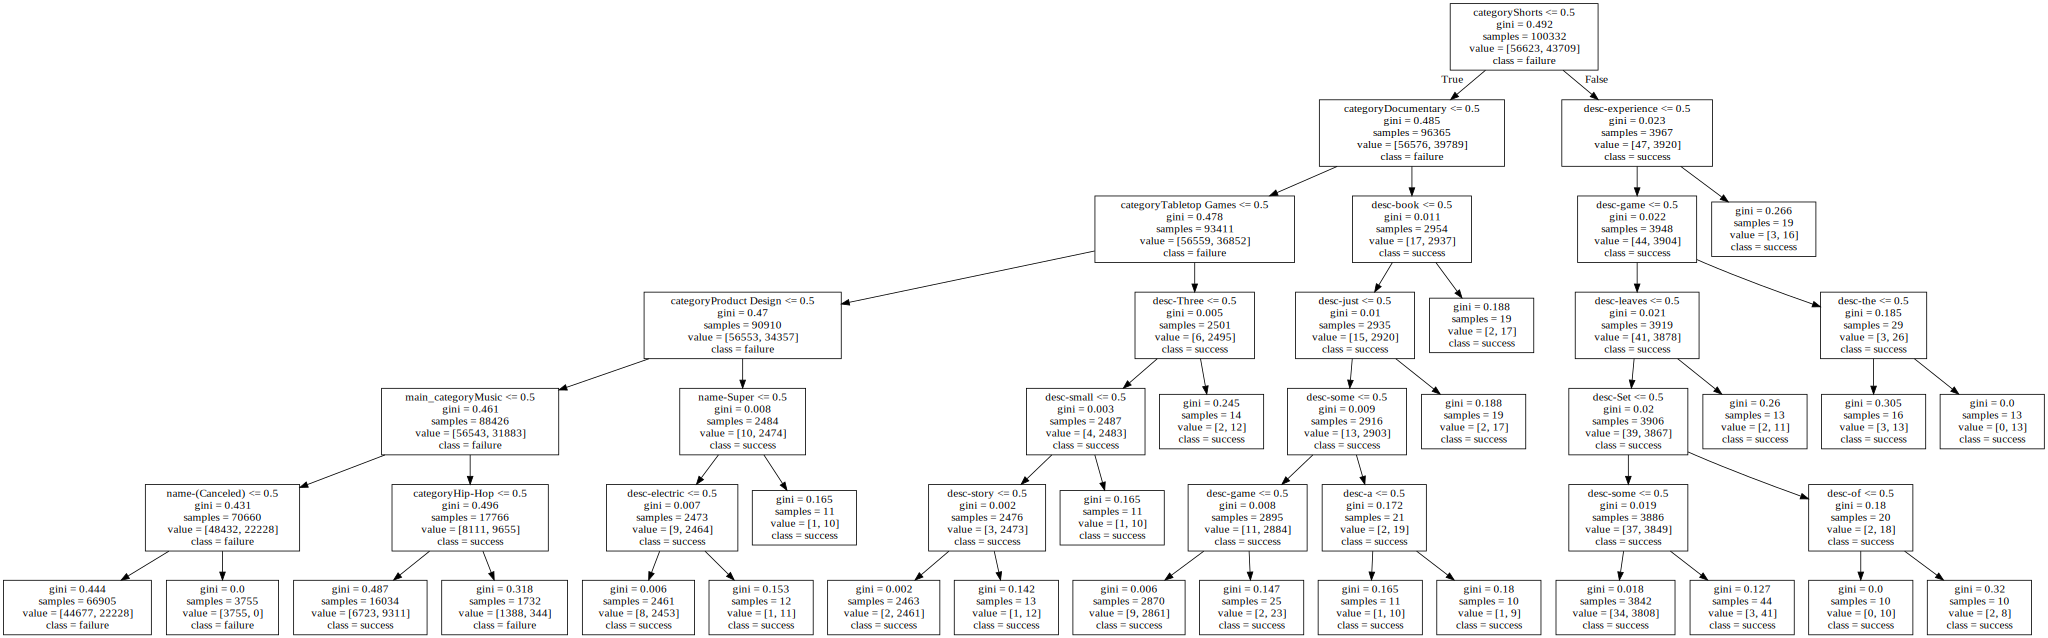

In [20]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot =export_graphviz(dtree, out_file=None, feature_names = string_feature_names, class_names=('failure', 'success'))
Source(dot)